In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.html.widgets import interact

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import networkx as nx

In [4]:
# wrap a few graph generation functions so they have the same signature

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

In [ ]:
interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
        generator={'lobster': random_lobster,
                   'power law': powerlaw_cluster,
                   'Newman-Watts-Strogatz': newman_watts_strogatz,
                   u'Erdős-Rényi': erdos_renyi,
                   });

In [28]:
def mass_plummer(a):
    #a = a*units.kpc
    Mass = M*r**3 / (a**2 + r**2)**(3/2.)
    plot(r, Mass)
    return Mass

def rho_plummer(a):
    #a = a*units.kpc
    rho = 3*M / (4 *np.pi * a**3) * (1 + r**2/a**2)**(-5/2)
    plot(r, rho)
    return rho

def potential_plummer(a):
    #a = a*units.kpc
    phi =  - G*M / np.sqrt(r**2 + a**2)
    plot(r, phi)
    return phi

def vc_plummer(a):
    #a = a*units.kpc
    vc = np.sqrt(G*M*( r**2/(r**2 + a**2)**(3/2.)))
    plot(r, vc)
    plt.ylim(0, 4)
    return vc

def plot_random_graph(a,generator):
    g = generator(a)
    plt.show()

In [29]:
r = linspace(0, 25)
M = 1E12
print m
from astropy import constants
G = constants.G
G = G.value

1e+12


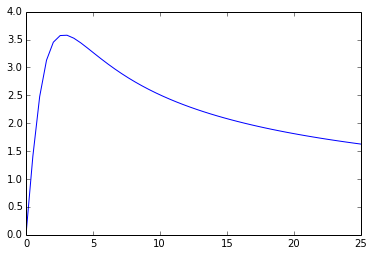

None

In [30]:
interact(plot_random_graph, a=(2,15), M=m, p=(0.0, 1.0, 0.001),
        generator={'Mass': mass_plummer,
                   r'Density': rho_plummer,
                   r'Potential': potential_plummer,
                   u'Rotation curve': vc_plummer,
                   });